# Assignment 2:Data Wrangling Part 2
Name: Shashank Udgirkar Roll no:31384 Batch: N3

In [1]:
#Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pylab

# Initial Preprocessing

In [2]:
#Loading dataset in pandas dataframe
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,NaN
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [3]:
#Returns first five rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,NaN
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
#Returns last five rows
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [5]:
#Prints the detail info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                995 non-null    float64
 7   writing score                995 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [6]:
#Returns a tuple containing dimensions i.e no of rows and no of columns
df.shape

(1000, 8)

In [5]:
#Return initial statistics
df.describe()

,math score,reading score,writing score
count,1000.000000,995.000000,995.000000
mean,66.709000,69.127638,68.041206
std,21.167957,14.620924,15.206139
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,513.000000,100.000000,100.000000


# Task1:Handling Null Values

In [6]:
#Returns the count of null values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  5
writing score                  5
dtype: int64

In [7]:
mean_value=df['reading score'].mean()
df['reading score'].fillna(value=mean_value, inplace=True)

In [8]:
mean_value=df['writing score'].mean()
df['writing score'].fillna(value=mean_value, inplace=True)

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#Displays datatype of each column
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                  float64
writing score                  float64
dtype: object

# Task 2: Outlier Detection

In [8]:
df['math score'].max()

513

In [9]:
Q1=df['math score'].quantile(0.25)
Q3=df['math score'].quantile(0.75)
Q1,Q3

(57.0, 77.0)

In [10]:
IQR=Q3-Q1
IQR

20.0

In [11]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(27.0, 107.0)

In [12]:
df[(df['math score']<lower_limit)|(df['math score']>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32.0,28.0
59,female,group C,some high school,free/reduced,none,0,17.0,10.0
145,female,group C,some college,free/reduced,none,22,39.0,33.0
166,male,group C,high school,free/reduced,completed,513,51.0,51.0
171,male,group E,some high school,standard,none,194,88.0,78.0
338,female,group B,some high school,free/reduced,none,24,38.0,27.0
466,female,group D,associate's degree,free/reduced,none,26,31.0,38.0
787,female,group B,some college,standard,none,19,38.0,32.0
842,female,group B,high school,free/reduced,completed,23,44.0,36.0
980,female,group B,high school,free/reduced,none,8,24.0,23.0


In [13]:
df_without_outliers=df[(df['math score']>lower_limit)&(df['math score']<upper_limit)]
df_without_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,NaN
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [14]:
lower_limit1=0
upper_limit1=100
df[(df['math score']<lower_limit1)|(df['math score']>upper_limit1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
110,female,group D,associate's degree,free/reduced,completed,107,89.0,98.0
121,male,group B,associate's degree,standard,completed,101,89.0,92.0
160,male,group B,associate's degree,free/reduced,completed,102,78.0,74.0
166,male,group C,high school,free/reduced,completed,513,51.0,51.0
171,male,group E,some high school,standard,none,194,88.0,78.0


In [15]:
df_without_outliers1=df[(df['math score']>lower_limit1)&(df['math score']<upper_limit1)]
df_without_outliers1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,NaN
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


<AxesSubplot:xlabel='math score'>

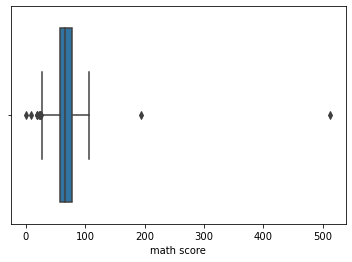

In [16]:
import seaborn as sns
sns.boxplot(x=df['math score'])

<AxesSubplot:xlabel='math score'>

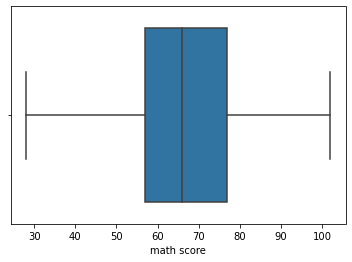

In [17]:
sns.boxplot(x=df_without_outliers['math score'])

<AxesSubplot:xlabel='math score'>

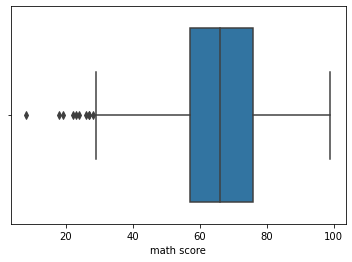

In [19]:
sns.boxplot(x=df_without_outliers1['math score'])

# Task 3: Converting to Normal Distribution(Data Transformation) 

In [20]:
df.skew()

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_6644/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


math score       9.482181
reading score   -0.252558
writing score   -0.288592
dtype: float64

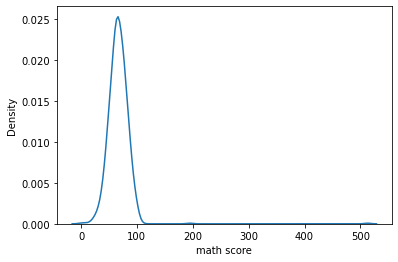

In [21]:
sns.kdeplot(df['math score']);

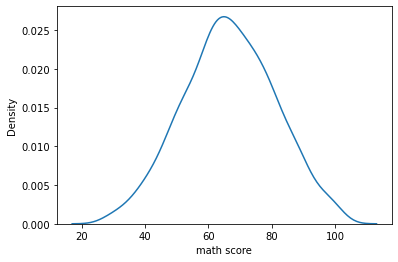

In [22]:
sns.kdeplot(df_without_outliers['math score']);

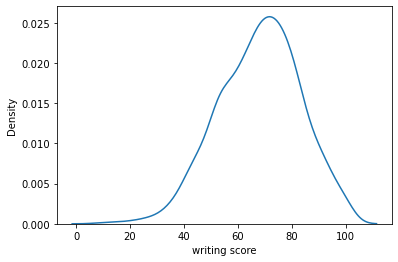

In [23]:
sns.kdeplot(df['writing score']);

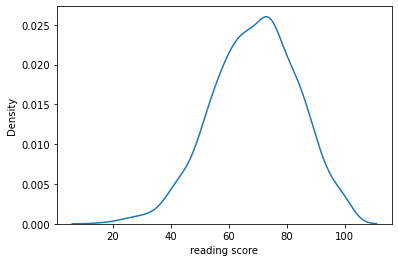

In [24]:
sns.kdeplot(df['reading score']);

In [25]:
df_without_outliers['math score'].mean()

66.56636271529888

In [26]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

C:\Users\SHASHANK\AppData\Local\Temp/ipykernel_10124/3265283792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['math score reciprocal']=1/df_without_outliers['math score']


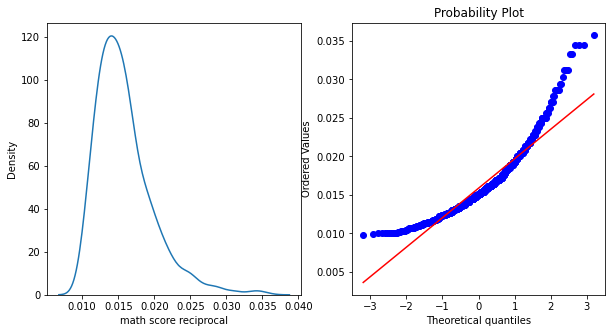

In [29]:
df_without_outliers['math score reciprocal']=1/df_without_outliers['math score']
normality(df_without_outliers,'math score reciprocal')


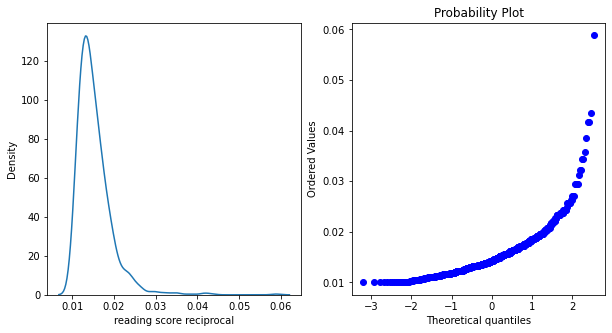

In [28]:
df['reading score reciprocal']=1/df['reading score']
normality(df,'reading score reciprocal')

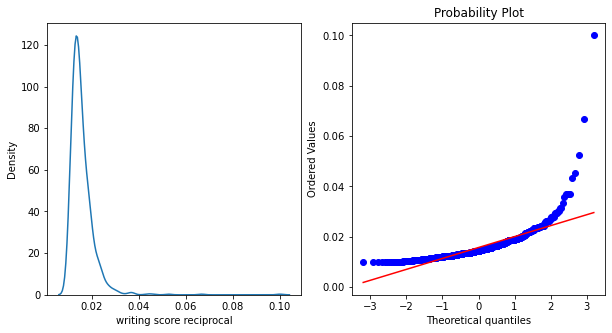

In [48]:
df['writing score reciprocal']=1/df['writing score']
normality(df,'writing score reciprocal')

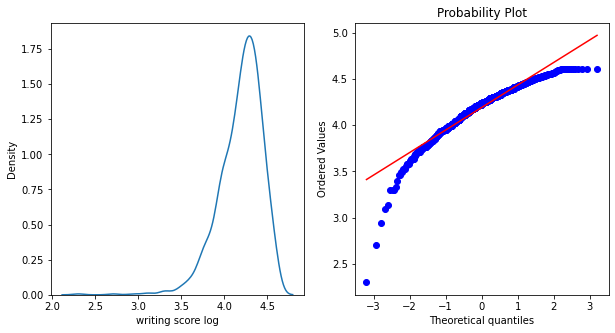

In [30]:
#performing logarithmic transformation on the feature
df['writing score log']=np.log(df['writing score'])
normality(df,'writing score log')